<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_Retentioneering_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown 1cy_FSvl5zBq6uyrKu6F297jYCpHYv_1Q

Downloading...
From: https://drive.google.com/uc?id=1cy_FSvl5zBq6uyrKu6F297jYCpHYv_1Q
To: /content/dataset_ymarket_offers.csv
100% 2.47M/2.47M [00:00<00:00, 97.1MB/s]


In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import KNNImputer
import re
from sklearn.preprocessing import MinMaxScaler
import sqlite3
con = sqlite3.connect('db')
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [ ]:
data = pd.read_csv('/content/dataset_ymarket_offers.csv')

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            44904 non-null  int64  
 1   offer_id            44904 non-null  int64  
 2   clicks              44904 non-null  float64
 3   cost                44904 non-null  float64
 4   orders_number       44904 non-null  float64
 5   revenue_value       44904 non-null  float64
 6   orders_number_conf  44904 non-null  float64
 7   revenue_value_conf  44904 non-null  float64
 8   profit              44904 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.1 MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
store_id,44904.0,7.710796e+07,1416.857760,7.710711e+07,77107117.0,77107146.0,77110359.00,7.711052e+07
offer_id,44904.0,5.333619e+06,862450.709242,2.994140e+05,5480675.0,5756678.0,5825306.00,5.918687e+06
clicks,44904.0,4.629187e+00,19.828497,1.000000e+00,1.0,1.0,3.00,1.611000e+03
cost,44904.0,1.266137e+02,831.678800,7.200000e-01,10.8,25.2,65.88,8.263116e+04
orders_number,44904.0,1.489245e-01,0.942510,0.000000e+00,0.0,0.0,0.00,7.817429e+01
revenue_value,44904.0,2.083618e+03,21675.258457,0.000000e+00,0.0,0.0,0.00,3.241489e+06
orders_number_conf,44904.0,8.158998e-02,0.593951,0.000000e+00,0.0,0.0,0.00,5.023429e+01
revenue_value_conf,44904.0,1.018684e+03,14102.342117,0.000000e+00,0.0,0.0,0.00,2.377430e+06
profit,44904.0,1.204372e+02,1259.221245,-1.020650e+05,0.0,0.0,0.00,1.220801e+05


In [ ]:
df.isna().sum().sum()

0

In [ ]:
msno.matrix(df)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.sample(20, replace=True)

,store_id,offer_id,clicks,cost,orders_number,revenue_value,orders_number_conf,revenue_value_conf,profit,DRR,CPA,CPC,CR,ROI,DDR_type
20894,77107151,5637170,24.0,591.84,1.200000,15588.000000,1.200000,15588.000000,2802.356558,26.338200,493.200000,24.660000,5.000000,373.499013,good
27765,77107113,5775311,126.0,4161.24,12.271429,117056.028571,7.014286,66120.485714,10347.219570,28.130083,339.099884,33.025714,9.739229,148.657121,good
25932,77107113,4347623,6.0,82.44,1.200000,4188.000000,1.200000,4188.000000,1476.669794,50.800582,68.700000,13.740000,20.000000,1691.205476,good
9205,77107128,5635709,57.0,609.12,12.400000,74276.000000,8.800000,52712.000000,6323.333099,121.939848,49.122581,10.686316,21.754386,938.109584,good
5131,77107126,5798003,21.0,653.04,1.600000,20784.000000,1.200000,15588.000000,4305.570023,31.826534,408.150000,31.097143,7.619048,559.311837,good
34709,77107153,5846399,49.0,1144.80,1.000000,17190.000000,0.700000,11793.000000,1062.032730,15.015723,1144.800000,23.363265,2.040816,-7.229845,good
8548,77107187,5815340,33.0,849.96,2.800000,62366.000000,2.800000,62366.000000,10052.690236,73.375218,303.557143,25.756364,8.484848,1082.725097,good
26696,77107113,5660600,84.0,2363.40,14.850000,114803.550000,4.200000,31779.000000,2232.090698,48.575590,159.151515,28.135714,17.678571,-5.555949,good
4318,77107125,5818796,83.0,3521.88,4.150000,75887.676667,1.986667,33670.200000,4630.466836,21.547491,848.645783,42.432289,5.000000,31.477133,good
29437,77107113,5885069,16.0,973.44,1.200000,18588.000000,0.600000,9294.000000,1808.217955,19.095168,811.200000,60.840000,7.500000,85.755461,good


(Чтобы выделить «полезную» выборку, берем только позиции, у которых кликов больше 3 и доход больше 1000р)


In [ ]:
df = df.loc[(df['clicks'] > 3) & (df['profit'] > 1000)]

Постройте график – распределение расходов и дохода по топ 10 прибыльным offer_id (здесь независимо от магазина)


In [ ]:
t = df.groupby('offer_id').profit.sum().nlargest(10).index
t = df[df['offer_id'].isin(t)]
px.histogram(t, x="profit", nbins=50)

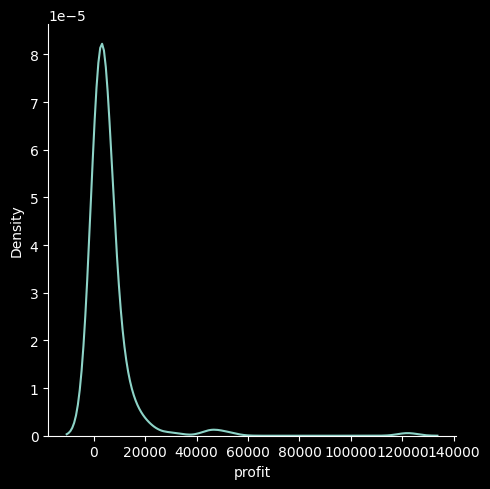

In [ ]:
sns.displot(t, x="profit", kind="kde")

In [ ]:
t = df.groupby('offer_id').profit.sum().nsmallest(10).index
t = df[df['offer_id'].isin(t)]
px.histogram(t, x="profit", nbins=20)

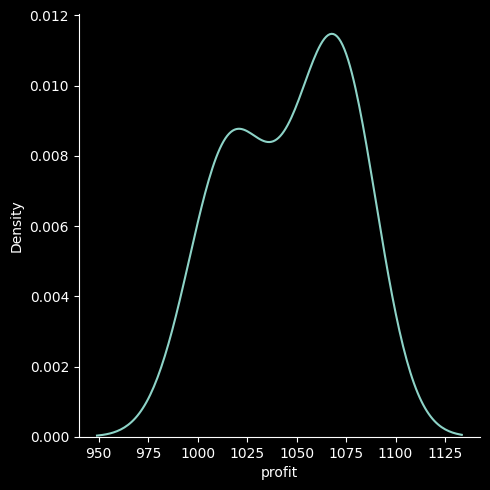

In [ ]:
sns.displot(t, x="profit", kind="kde")

Посчитать показатели ДРР, ROAS, какие еще показатели вы бы добавили? Необходимо обосновать выбор.


In [ ]:
df['DRR'] = df['revenue_value'] / df['cost']
df['CPA'] = df['cost'] / df['orders_number']
df['CPC'] = df['cost'] / df['clicks']
df['CR'] = (df['orders_number'] / df['clicks']) * 100
df['ROI'] = ((df['profit'] - df['cost']) / df['cost']) * 100

In [ ]:
df['DDR_type'] = df['DRR'].apply(lambda x: 'bad' if x<10 else 'good')

Найти товары, эффективные по соотношению прибыли и расходов. Обосновать


In [ ]:
df['ROI'] = df['profit'] / df['cost']
df['ROAS'] = df['revenue_value'] / df['cost']
df['Profit_per_click'] = df['profit'] / df['clicks']

In [ ]:
df.sort_values(by='ROI', ascending=False).head(10)

,store_id,offer_id,clicks,cost,orders_number,revenue_value,orders_number_conf,revenue_value_conf,profit,DRR,CPA,CPC,CR,ROI,DDR_type,ROAS,Profit_per_click
34787,77107153,5901758,6.0,78.48,0.75,46491.75,0.75,46491.75,9685.385168,592.402523,104.64,13.080000,12.500000,123.412145,good,592.402523,1614.230861
4594,77107125,5902409,4.0,14.40,2.40,7176.00,1.20,3588.00,1763.999370,498.333333,6.00,3.600000,60.000000,122.499956,good,498.333333,440.999842
34106,77107116,5902409,7.0,23.76,2.40,6456.00,2.40,6456.00,2807.999687,271.717172,9.90,3.394286,34.285714,118.181805,good,271.717172,401.142812
5945,77110390,5776130,7.0,31.32,1.20,25414.80,1.20,25414.80,3472.782546,811.455939,26.10,4.474286,17.142857,110.880669,good,811.455939,496.111792
11086,77110385,4347422,4.0,17.28,2.40,5496.00,2.40,5496.00,1732.513609,318.055556,7.20,4.320000,60.000000,100.261204,good,318.055556,433.128402
35273,77107145,5881082,5.0,106.92,1.20,59988.00,1.20,59988.00,10060.118051,561.054994,89.10,21.384000,24.000000,94.090143,good,561.054994,2012.023610
18537,77107129,5794235,4.0,21.24,1.20,11352.00,1.20,11352.00,1898.587200,534.463277,17.70,5.310000,30.000000,89.387345,good,534.463277,474.646800
28662,77107113,5822255,5.0,32.40,1.20,7366.80,1.20,7366.80,2841.195140,227.370370,27.00,6.480000,24.000000,87.691208,good,227.370370,568.239028
30593,77110359,5740772,4.0,18.72,1.00,8082.60,1.00,8082.60,1635.112227,431.762821,18.72,4.680000,25.000000,87.345739,good,431.762821,408.778057
15507,77107142,5820818,4.0,153.00,1.20,47982.00,1.20,47982.00,12707.701709,313.607843,127.50,38.250000,30.000000,83.056874,good,313.607843,3176.925427
